In [1]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
root_outliers   = '/global/cscratch1/sd/vboehm/SDSSOutlier'
root_model_data = '/global/cscratch1/sd/vboehm/Datasets/sdss/by_model/'

label           = 'galaxies_quasars_bins1000_wl3388-8318'
label_          = label+'_minz005_maxz036_minSN50'
label_2         = label+'_minz01_maxz036_minSN50'+'_8_fully_connected_mean_div'

In [3]:
logps = np.load(os.path.join(root_outliers,'valid_test_train_logps.npy.npz'))

In [4]:
df_extern = pd.read_csv('./external_data/Baronetal_weirdness.csv')

In [5]:
df_extern = df_extern.rename(columns={' mjd':'mjd', ' fiber':'fiber'})

In [6]:
valid_data = np.load(os.path.join(root_model_data,'valid_%s.npy.npz'%label_2))
test_data  = np.load(os.path.join(root_model_data,'test_%s.npy.npz'%label_2))
train_data = np.load(os.path.join(root_model_data,'train_%s.npy.npz'%label_2))

In [7]:
def make_dataframe(data, logps):
    array= np.vstack([data['arr_9'].astype(float).astype(int), data['arr_8'].astype(float).astype(int), data['arr_10'].astype(float).astype(int)+1, data['arr_3'], data['arr_4'], data['arr_5'], logps, np.arange(len(logps))])
    df = pd.DataFrame(array.T,columns=['plate','mjd','fiber','z','ra', 'dec', 'logps', 'indices'])
    return df

In [8]:
df_test = make_dataframe(test_data, logps['arr_1'])
df_test.head()

,plate,mjd,fiber,z,ra,dec,logps,indices
0,4083.0,55441.0,796.0,0.324435,324.471161,4.145928,-11.050854,0.0
1,6141.0,56210.0,754.0,0.152645,347.061096,15.698352,-3.012178,1.0
2,5405.0,56010.0,8.0,0.317508,190.654205,13.532576,-15.131476,2.0
3,6124.0,56211.0,542.0,0.124120,350.912048,21.184078,-0.420825,3.0
4,7291.0,56992.0,358.0,0.351629,143.310379,51.329739,-9.993931,4.0


In [9]:
df_overlap=df_extern.merge(df_test,how='inner',on=['plate','mjd','fiber'])

In [10]:
df_overlap

,plate,mjd,fiber,weirdness,z,ra,dec,logps,indices
0,6138.0,56598.0,270.0,0.704100,0.197557,356.086426,15.769970,-9.266543,7065.0
1,4303.0,55508.0,172.0,0.454018,0.106075,9.564927,2.763724,-4.939222,3934.0
2,4062.0,55383.0,840.0,0.463208,0.100854,250.526825,19.482677,-11.756293,11670.0
3,6425.0,56298.0,470.0,0.440523,0.110802,157.069443,22.740299,-1.205669,6671.0
4,6530.0,56537.0,765.0,0.425779,0.105418,7.920242,34.013168,-1.202900,13624.0
...,...,...,...,...,...,...,...,...,...
17198,6973.0,56741.0,109.0,0.429186,0.348288,190.083099,63.984047,-10.869630,18133.0
17199,7042.0,56573.0,81.0,0.418780,0.354914,14.010557,-5.945515,-11.829117,16421.0
17200,6678.0,56401.0,477.0,0.401824,0.348551,174.102219,47.502064,-11.018600,19654.0
17201,6832.0,56426.0,225.0,0.396358,0.339816,190.158569,54.537292,-8.695517,845.0


Text(0.5, 1.0, 'test dataset')

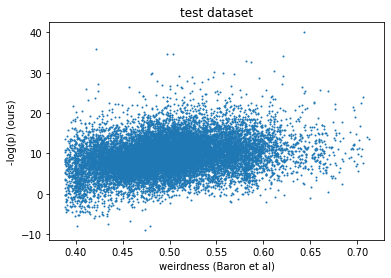

In [11]:
plt.scatter(df_overlap[' weirdness'],-df_overlap['logps'], s=1)
plt.xlabel('weirdness (Baron et al)')
plt.ylabel('-log(p) (ours)')
plt.title('test dataset')

Text(0.5, 1.0, 'test dataset')

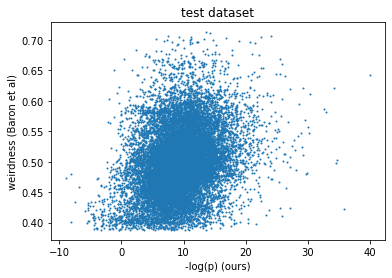

In [12]:
plt.scatter(-df_overlap['logps'],df_overlap[' weirdness'], s=1)
plt.ylabel('weirdness (Baron et al)')
plt.xlabel('-log(p) (ours)')
plt.title('test dataset')

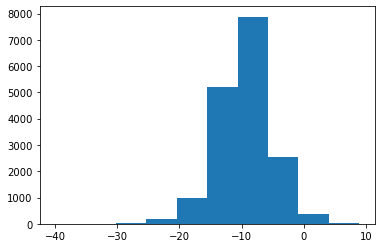

      plate      mjd  fiber   weirdness         z          ra        dec  \
596  7049.0  56570.0  806.0    0.668725  0.159549   24.899998  -4.473269   
610  5055.0  55889.0  436.0    0.673947  0.128989  341.698486   9.433781   
628  7146.0  56573.0  844.0    0.673611  0.135491  358.342957  -7.056495   
736  7161.0  56625.0  896.0    0.672398  0.151999   23.412350  -6.949893   
795  5656.0  55940.0  760.0    0.683562  0.127844    9.342601  12.307733   
842  7164.0  56597.0  570.0    0.676768  0.132069   26.779366  -6.937826   

        logps  indices  
596 -0.408448  10103.0  
610 -4.386481  12592.0  
628 -3.811372  13929.0  
736 -4.448943  13548.0  
795 -2.340573   3920.0  
842 -3.937140  23563.0  


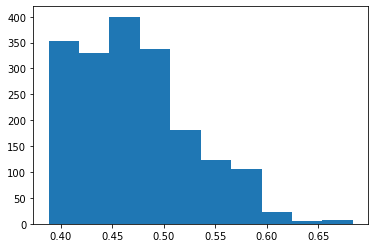

In [69]:
_=plt.hist(df_overlap['logps'])
plt.show()
extreme_end_1 = df_overlap[df_overlap['logps']>-4.5]
_=plt.hist(extreme_end_1[' weirdness'])
extreme_end_1 = extreme_end_1[extreme_end_1[' weirdness']>0.66]
print(extreme_end_1)

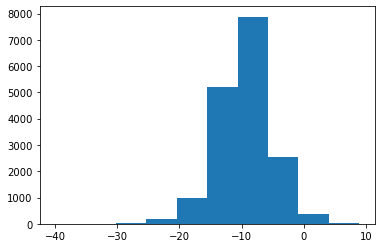

        plate      mjd  fiber   weirdness         z          ra        dec  \
2538   6830.0  56429.0  712.0    0.420843  0.133257  197.597427  57.989105   
2810   5121.0  55856.0  641.0    0.424022  0.164792   25.465933  21.119396   
7763   4832.0  55680.0  698.0    0.412733  0.269188  184.243027   6.113027   
16883  3807.0  55511.0  987.0    0.424189  0.319321  126.888672  43.254974   
16958  5489.0  55990.0  432.0    0.435727  0.355807  228.783920  10.659965   
17132  5422.0  55986.0  167.0    0.410950  0.335185  198.318481  10.998135   
17177  7090.0  56659.0  442.0    0.421782  0.351947  155.291946  60.509499   

           logps  indices  
2538  -23.703478   7328.0  
2810  -27.172974   3575.0  
7763  -23.209833   6196.0  
16883 -25.486616   2993.0  
16958 -22.394732  12464.0  
17132 -25.838575  10756.0  
17177 -35.847340  19701.0  


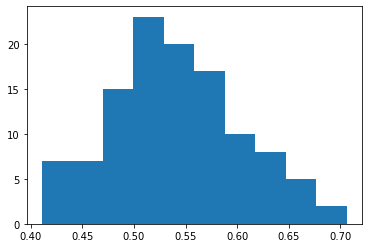

In [71]:
_ = plt.hist(df_overlap['logps'])
plt.show()
extreme_end_2 = df_overlap[df_overlap['logps']<-22]
_ = plt.hist(extreme_end_2[' weirdness'])
extreme_end_2 = extreme_end_2[extreme_end_2[' weirdness']<0.44]
print(extreme_end_2)


Text(0.5, 1.0, 'test dataset')

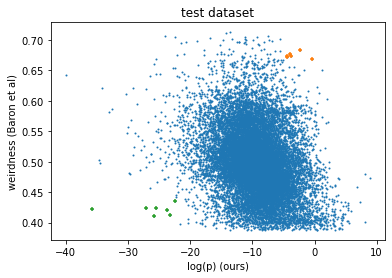

In [72]:
plt.scatter(df_overlap['logps'],df_overlap[' weirdness'], s=1)
plt.scatter(extreme_end_1['logps'],extreme_end_1[' weirdness'], s=10, marker='+')
plt.scatter(extreme_end_2['logps'],extreme_end_2[' weirdness'], s=10, marker='+')
plt.ylabel('weirdness (Baron et al)')
plt.xlabel('log(p) (ours)')
plt.title('test dataset')

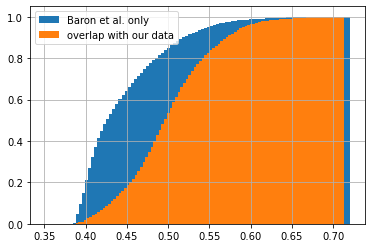

In [13]:
_=plt.hist(df_extern[' weirdness'],cumulative=True, bins=100, density=True, label='Baron et al. only')
_=plt.hist(df_overlap[' weirdness'],cumulative=True, bins=100, density=True, label='overlap with our data')
plt.grid()
plt.legend()
plt.legend()

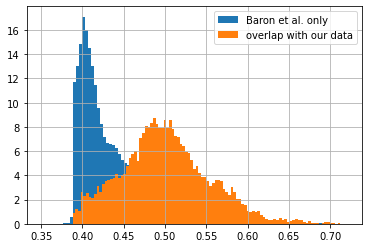

In [14]:
_=plt.hist(df_extern[' weirdness'],cumulative=False, bins=100, density=True, label='Baron et al. only')
_=plt.hist(df_overlap[' weirdness'],cumulative=False, bins=100, density=True, label='overlap with our data')
plt.grid()
plt.legend()
plt.legend()

In [15]:
np.mean(df_overlap[' weirdness']), np.mean(df_extern[' weirdness'])

(0.5006304815390316, 0.44550376820455256)

In [16]:
df_10percent = df_overlap[df_overlap[' weirdness']>0.52]

In [17]:
df_10percent.to_csv('10percent_weirdest_overlap_valid.csv')

In [18]:
df_overlap

,plate,mjd,fiber,weirdness,z,ra,dec,logps,indices
0,6138.0,56598.0,270.0,0.704100,0.197557,356.086426,15.769970,-9.266543,7065.0
1,4303.0,55508.0,172.0,0.454018,0.106075,9.564927,2.763724,-4.939222,3934.0
2,4062.0,55383.0,840.0,0.463208,0.100854,250.526825,19.482677,-11.756293,11670.0
3,6425.0,56298.0,470.0,0.440523,0.110802,157.069443,22.740299,-1.205669,6671.0
4,6530.0,56537.0,765.0,0.425779,0.105418,7.920242,34.013168,-1.202900,13624.0
...,...,...,...,...,...,...,...,...,...
17198,6973.0,56741.0,109.0,0.429186,0.348288,190.083099,63.984047,-10.869630,18133.0
17199,7042.0,56573.0,81.0,0.418780,0.354914,14.010557,-5.945515,-11.829117,16421.0
17200,6678.0,56401.0,477.0,0.401824,0.348551,174.102219,47.502064,-11.018600,19654.0
17201,6832.0,56426.0,225.0,0.396358,0.339816,190.158569,54.537292,-8.695517,845.0


In [19]:
df_overlap.to_csv('Baronetal_overlap_valid.csv')